# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 提出问题
 
#### 1.战役类型和攻守双方战力对比与战役胜率之间的关系？
#### 2.哪位好战分子出场率最高？


## 数据评估和清理

In [1]:
# TO DO: load pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [2]:
# TO DO: load the dataset
battles=pd.read_csv('battles.csv')
pd.options.display.max_columns=1000 #显示全部列
battles.sample(5)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,siege,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
27,Battle of Castle Black,300,28,Stannis Baratheon,Mance Rayder,Free folk,Thenns,Giants,NaN,Night's Watch,Baratheon,NaN,NaN,loss,siege,1.0,1.0,100000.0,1240.0,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",0.0,Castle Black,Beyond the Wall,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,siege,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
14,Battle of Oxcross,299,15,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,6000.0,10000.0,"Robb Stark, Brynden Tully","Stafford Lannister, Roland Crakehall, Antario ...",1.0,Oxcross,The Westerlands,NaN


In [3]:
# TO DO: check the dataset general info
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

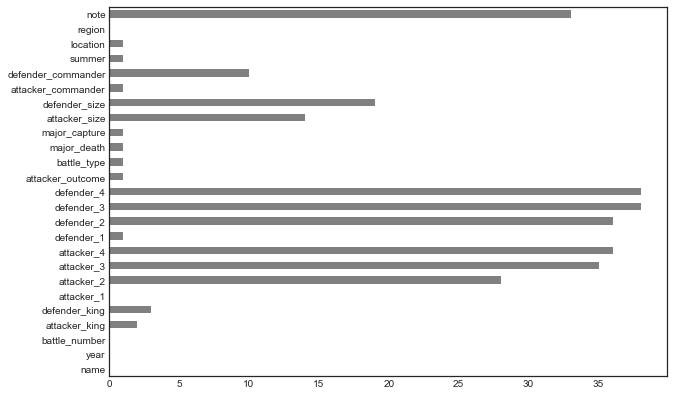

In [4]:
#检查各列缺失值大概数量
battles.isnull().sum().plot(kind="barh",color='grey',figsize=(10, 6.8));

In [5]:
#查看战争结果缺失值行的内容
battles[battles.attacker_outcome.isnull()]

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,Frey,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


In [6]:
# 检查战役是否存在重复值
battles.battle_number.is_unique

True

### 从上面可以看出，数据集整体缺失值较多，但大部分无关紧要（如进攻方或防御方的将领、国王中的缺失值可以看做未参加战役，可以改为计算参与人数）。根据后续分析结果再进行筛选及调整。

## 数据探索分析

首先开始对第一个问题进行探索哪种战役类型的胜率较高？

In [7]:
#生成1列count用于统计胜率及次数，利用透视表整理战役类型与胜率的关系
battles['count']=1
battletype=battles.pivot_table('count',index='battle_type',columns='attacker_outcome',aggfunc=sum,fill_value=0).reset_index()

In [8]:
#计算胜率及失败率
battletype['win_rate']=battletype.win/(battletype.win+battletype.loss)
battletype['loss_rate']=battletype.loss/(battletype.win+battletype.loss)
battletype

attacker_outcome,battle_type,loss,win,win_rate,loss_rate
0,ambush,0,10,1.000000,0.000000
1,pitched battle,4,10,0.714286,0.285714
2,razing,0,2,1.000000,0.000000
3,siege,1,10,0.909091,0.090909


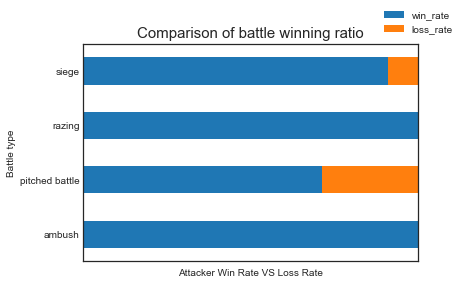

In [9]:
#绘制条形图
p=battletype.plot.barh(x='battle_type', y=['win_rate','loss_rate'],stacked=True)
_ = p.set(xticklabels = "", xlim = [0, 1], ylabel = "Battle type", xlabel = "Attacker Win Rate VS Loss Rate")
plt.title('Comparison of battle winning ratio', fontsize =15)
plt.legend(loc='center', bbox_to_anchor=(1, 1.1))
plt.show()

### 从上图中可以看出，razing和ambush胜率惊人，虽然数据量不多，但是胜率也是高达100%，看来出奇制胜也许才是胜利的关键,siege并未给防守方带来更多获胜的机会，进攻方仍然可以达到90%胜率。除去战役类型，接下来对双方战斗力进行分析。

In [10]:
battlesize = battles[["attacker_size", "defender_size", "attacker_outcome","count"]].dropna(axis = 0)
battlesize['size_diff']=battlesize.attacker_size-battlesize.defender_size
battlesize

,attacker_size,defender_size,attacker_outcome,count,size_diff
0,15000.0,4000.0,win,1,11000.0
2,15000.0,10000.0,win,1,5000.0
3,18000.0,20000.0,loss,1,-2000.0
4,1875.0,6000.0,win,1,-4125.0
5,6000.0,12625.0,win,1,-6625.0
10,244.0,900.0,win,1,-656.0
13,618.0,2000.0,win,1,-1382.0
14,6000.0,10000.0,win,1,-4000.0
15,5000.0,20000.0,win,1,-15000.0
16,20000.0,10000.0,loss,1,10000.0


In [11]:
import statsmodels.api as sm
battlesize[['loss','win']]=pd.get_dummies(battlesize['attacker_outcome'])
battlesize=battlesize.drop('loss',axis=1)

In [12]:
battlesize['intercept']=1
logit_mod=sm.Logit(battlesize['win'],battlesize[['intercept','size_diff']])
result=logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


G:\ANACONDA\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
G:\ANACONDA\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
G:\ANACONDA\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    win   No. Observations:                   15
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Nov 2018   Pseudo R-squ.:                     inf
Time:                        23:49:57   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9277      0.976      1.975      0.048       0.015       3.841
size_diff     -0.0002      0.000     -1.585      0.113      -0.000    4.62e-05
==============================================================================
"""

### 从逻辑回归分析的结果来看，战力差距似乎对进攻方的胜率并没有什么影响，接下来我们研究下第二个问题，到底哪个好战分子出场率最高呢？

In [13]:
#将进攻方的国王拆分成单个字符串并加入新list kings
kings=[] 
temp=[kings.extend(x) for x in battles.attacker_king.dropna().str.split("/")]

In [14]:
atk_king=pd.DataFrame(kings,columns=['atk_king'])
atk_king['count']=1

In [15]:
#统计进攻方国王出场率
atk=atk_king.groupby('atk_king').agg({'count':'count'}).reset_index().sort_values('count',ascending=False)[:].reset_index()

In [16]:
from pyecharts import TreeMap

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "G:\ANACONDA\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [17]:
#绘制矩形树图
data =  [{"value":atk['count'][i],
          "name":atk['atk_king'][i]} for i in range(atk.shape[0])]
treemap = TreeMap("进攻方国王出场率", width=600, height=300)
treemap.add("", data, is_label_show=True, label_pos='inside')
treemap.render()
treemap

### 看来Tommen Baratheon和Joffrey经常发动战争，疯狂抢镜啊

In [18]:
#将进攻方的指挥官拆分成单个字符串并加入新list commanders
commanders=[] 
temp=[commanders.extend(x) for x in battles.attacker_commander.dropna().str.split(",")]

In [19]:
atk_cmd=pd.DataFrame(commanders,columns=['atk_cmd'])
atk_cmd['count']=1

In [20]:
atk_commander=atk_cmd.groupby('atk_cmd').agg({'count':'count'}).reset_index().sort_values('count',ascending=False)[0:50].reset_index()

In [21]:
from pyecharts import WordCloud

In [22]:
name = atk_commander['atk_cmd'].tolist()
value = atk_commander['count'].tolist()
wordcloud = WordCloud(width=1200, height=600)
wordcloud.add("", name, value, word_size_range=[20, 100],shape='circle')
wordcloud.render()
wordcloud

### Robb Stark作为进攻方的指挥官，也是参与指挥了多场战役啊。

## 得出结论

**问题**：
#### 1.战役类型和攻守双方战力对比与战役胜率之间的关系？
**结论**：针对战役类型，使用诡计（ambush）和对未设防进攻（razing）获胜的几率较高，使用计谋和突袭可能对战果会有影响；相反攻守双方战力对比却没发现有明显影响胜率的因素，相关性不高。
#### 2.哪位好战分子出场率最高？
**结论**：进攻方国王Tommen Baratheon和Joffrey出场率最高，而指挥官中Robb Stark出场率最高

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：首先数据集中缺失内容较多，一定程度上影响了对数据的分析。由于时间有限，有些内容未做更深入的相关性分析，可以从多个因素分析影响胜率的因素，无法给出更加准确的结论，希望经过后面的学习，继续完善对项目的分析。